# Jordan Notebook - Exploratory Data Analysis

- Author: [Jordan](https://github.com/JfromNWMS/)
- Repository: [datafun-06-eda](https://github.com/JfromNWMS/datafun-06-eda)

## Imports
Greetings, I'm Jordan.  Today, we will perform exploratory data analysis on the mtcars dataset.  For some background on our dataset, the mtcars dataset was originaly taken from a 1974 issue of Motor Trend magazine where eleven atributes of thirty-two different cars are recorded.  We now begin our exploratory data analysis by importing some packages and modules that will aid in our analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import ipywidgets as widgets
from IPython.display import display

## Step 1. Data Acquisition
Let's go ahead and load our data into a pandas dataframe and look at the head of our dataframe.

In [2]:
mtcars: pd.DataFrame = pd.read_csv("data/mtcars.csv", index_col="model")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Step 2. Initial Data Inspection
With the use of pandas .head() method and the .shape and .dtypes atributes for pandas dataframes we can gain some additional information about our dataframe.

In [3]:
mtcars.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [4]:
mtcars.shape

(32, 11)

In [5]:
mtcars.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

## Step 3. Initial Descriptive Statistics
Now we use pandas .describe() method for dataframes to retrieve the summary statistics for our dataset.

In [6]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Step 4.  Initial Data Distribution for Numerical Columns
A great way to get an idea about the distribution of numerical data is to look at a histogram, so let's take a look at some histograms of our continuous numerical data.  First we will look at a histogram of the mpg variable and then we will look at histograms for all the continuous variables in the dataset.

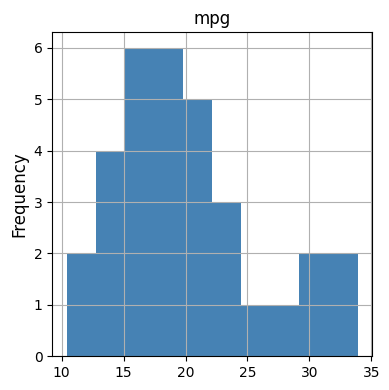

In [7]:
fig = mtcars['mpg'].hist(color = 'steelblue', figsize = (4, 4))
fig.set_title('mpg')
fig.set_ylabel('Frequency', fontsize = 12)
plt.tight_layout()
plt.show()

Inspection of the histogram for the continuous variable mpg shows that the distribution of the data is right skewed.

In [8]:
continuous_variables: list = ['mpg','disp','hp','drat','wt','qsec']

mtcars_plot: pd.DataFrame = mtcars[continuous_variables].copy()

def plot_hist(bins: int) -> None:
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
    axes = axes.flatten()
    mtcars_plot.hist(ax=axes, bins=bins, color='steelblue')
    [axes.title.set_size(16) for axes in axes.ravel()]
    [axes.tick_params(axis='both', labelsize=10) for axes in axes]
    fig.supylabel('frequency', fontsize = 14)
    plt.tight_layout()
    plt.show()

bins_slider = widgets.IntSlider(min=10, max=50, step=10, value=10, description='Bins:')
bins_slider.style.handle_color = 'steelblue'
out = widgets.interactive_output(plot_hist, {'bins': bins_slider})
display(bins_slider, out)

IntSlider(value=10, description='Bins:', max=50, min=10, step=10, style=SliderStyle(handle_color='steelblue'))

Output()

The histograms above show that the distribution of data for mpg, disp, and hp are all right skewed.  The distribution of data for drat and wt both show a more symmetrical distribution with slight right skewness and the qsec data shows a strong symmetrical distribution.

## Step 5. Initial Data Distribution for Categorical Columns

Now we will take a count for each of the categorical variables of the dataset to see how many categories each variable has and how many observations each category has. 

In [9]:
mtcars['cyl'].value_counts().reset_index()

,cyl,count
0,8,14
1,4,11
2,6,7


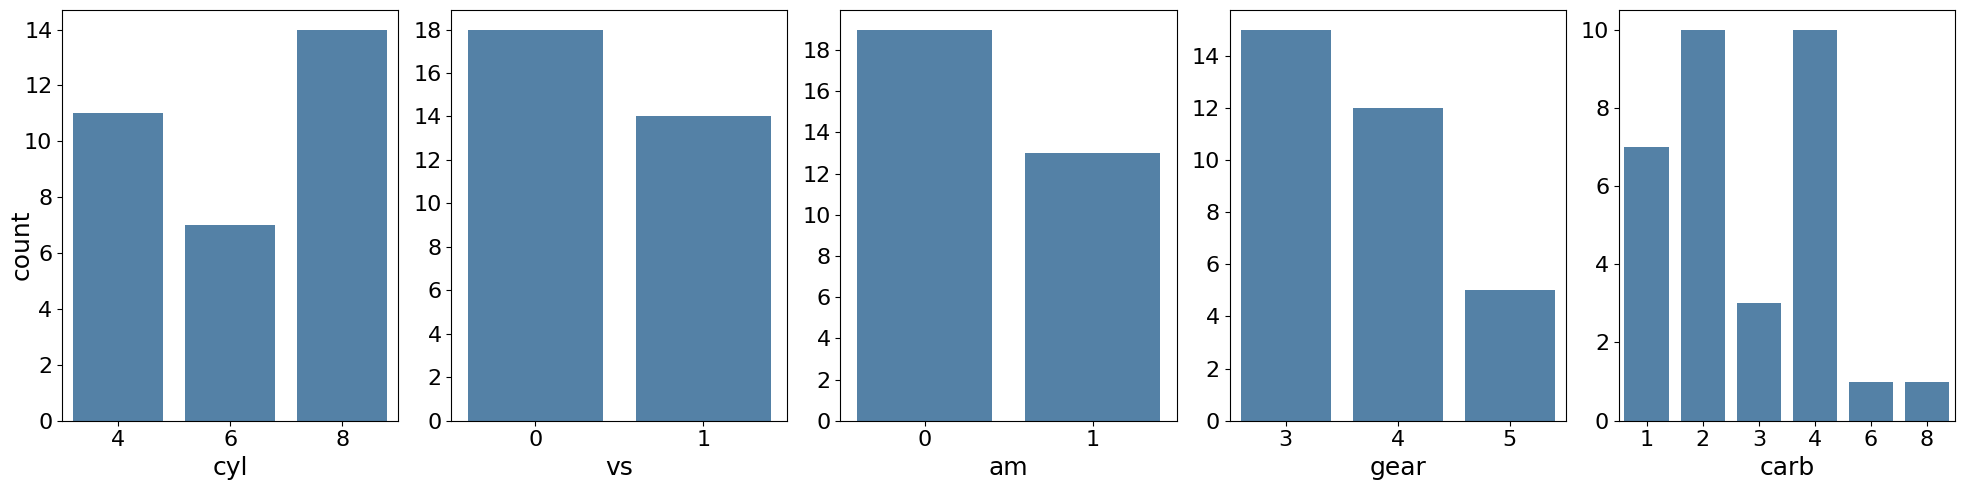

In [10]:
categorical_variables: list = [col for col in mtcars.columns if col not in continuous_variables]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for index, col in enumerate(categorical_variables):
    sns.countplot(x=col, data=mtcars, ax=axes[index], color='steelblue')
    axes[index].set(ylabel=None)
    axes[index].yaxis.set_major_locator(MaxNLocator(integer=True))
    axes[index].tick_params(axis='both', labelsize=16)
    axes[index].set_xlabel(axes[index].get_xlabel(), fontsize=18)

fig.supylabel('count', fontsize = 18)
plt.tight_layout()
plt.show()

We find from our count plots that out of our five categorical variables vs and am have two categories, cyl and gear have three categories, and the carb variable has six categories with none of the categorical variables having an equal count of their respective categories.

## Step 6. Initial Data Transformation and Feature Engineering

We will create a new numerical column called "Displacement per Cylinder" by dividing "Engine Displacement" by 'Number of Cylinders', change our column names to better represent that data they contain, and map values to the categorical variables of 'Engine Type' and 'Transmission Type' in order to further aid our exploratory data analysis.

In [11]:
new_column_names = {'mpg': 'Fuel Economy',
                    'disp': 'Engine Displacement',
                    'hp': 'Gross Horsepower',
                    'drat': 'Rear Axle Ratio',
                    'wt': 'Weight',
                    'qsec': 'Quarter Mile Time',
                    'cyl': 'Number of Cylinders',
                    'vs': 'Engine Type',
                    'am': 'Transmission Type',
                    'gear': 'Number of Forward Gears',
                    'carb': 'Number of Carburetors'}

mtcars.rename(columns=new_column_names, inplace=True)
mtcars['Engine Type'] = mtcars['Engine Type'].replace({0: 'V', 1: 'Straight'})
mtcars['Transmission Type'] = mtcars['Transmission Type'].replace({0: 'Automatic', 1: 'Manual'})
mtcars['Displacement per Cylinder'] = mtcars['Engine Displacement'] / mtcars['Number of Cylinders']
categorical_variables = [new_column_names.get(name, name) for name in categorical_variables]
continuous_variables  = [name for name in mtcars.columns if name not in categorical_variables]
mtcars.head()

,Fuel Economy,Number of Cylinders,Engine Displacement,Gross Horsepower,Rear Axle Ratio,Weight,Quarter Mile Time,Engine Type,Transmission Type,Number of Forward Gears,Number of Carburetors,Displacement per Cylinder
model,,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V,Manual,4,4,26.666667
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V,Manual,4,4,26.666667
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,Straight,Manual,4,1,27.000000
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,Straight,Automatic,3,1,43.000000
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V,Automatic,3,2,45.000000


## Step 7. Initial Visualizations

We now have a general idea of the variables and their distributions in our dataset, let's take a look at some 
visualisations to give us a better idea on how our variables are related to one another.  We will begin by looking 
at boxplots of our continuous variables vs. two categorical variables to compare the distribution of the continuous 
variables accross different combinations of categorical variables.

### Boxplot

In [12]:
units: dict = {
    'Fuel Economy': ' (mpg)',
    'Displacement': ' (cu.in.)',
    'Displacement per Cylinder': ' (cu.in.)',
    'Gross Horsepower': ' (hp)',
    'Weight': ' (klbs)',
    'Quarter Mile Time': ' (sec.)'
    }

def plot_box(continuous: str, cat_one: str, cat_two: str) -> None:
    sns.boxplot(x=cat_one, y=continuous, data=mtcars, hue=cat_two)
    plt.ylabel(continuous + units.get(continuous, ''))
    plt.show()

con_dropdown = widgets.Dropdown(
    options = continuous_variables,
    description = 'Y-axis:',
    value = 'Quarter Mile Time'
    )
cat_one_dropdown = widgets.Dropdown(
    options = categorical_variables,
    description = 'X-axis:',
    value = 'Transmission Type'
    )
cat_two_dropdown = widgets.Dropdown(
    options = categorical_variables,
    description = 'Fill:',
    value = 'Engine Type'
    )

out = widgets.interactive_output(plot_box, {'continuous': con_dropdown, 'cat_one': cat_one_dropdown, 'cat_two': cat_two_dropdown})
display(widgets.HBox([widgets.VBox([con_dropdown, cat_one_dropdown, cat_two_dropdown]), out]))

Reviewing the different combinations of continuous variables vs. categorical variables there is one combination 
that stands out in particular, that is Quarter Mile Time vs. Transmission Type and Engine Type.  The boxplot reveals 
that cars with manual transmissions trend toward a faster quarter mile time and all cars with V engine types are faster 
in the quarter mile than all cars with straight engine types with the exception of one car.

In [13]:
max_time_v: float = max(mtcars[mtcars['Engine Type'] == 'V']['Quarter Mile Time'])
mtcars.query(f"`Engine Type` == 'Straight' and `Quarter Mile Time` < {max_time_v}").index.to_list()

['Lotus Europa']

After a quick computation we find that the car with a straight engine type that is faster than the slowest car with 
a V engine type is the Lotus Europa.

### Pairplot
To gain a better understanding on the connections between our continuous variables, we will view pairplots for all 
combinations of our continuous variables.

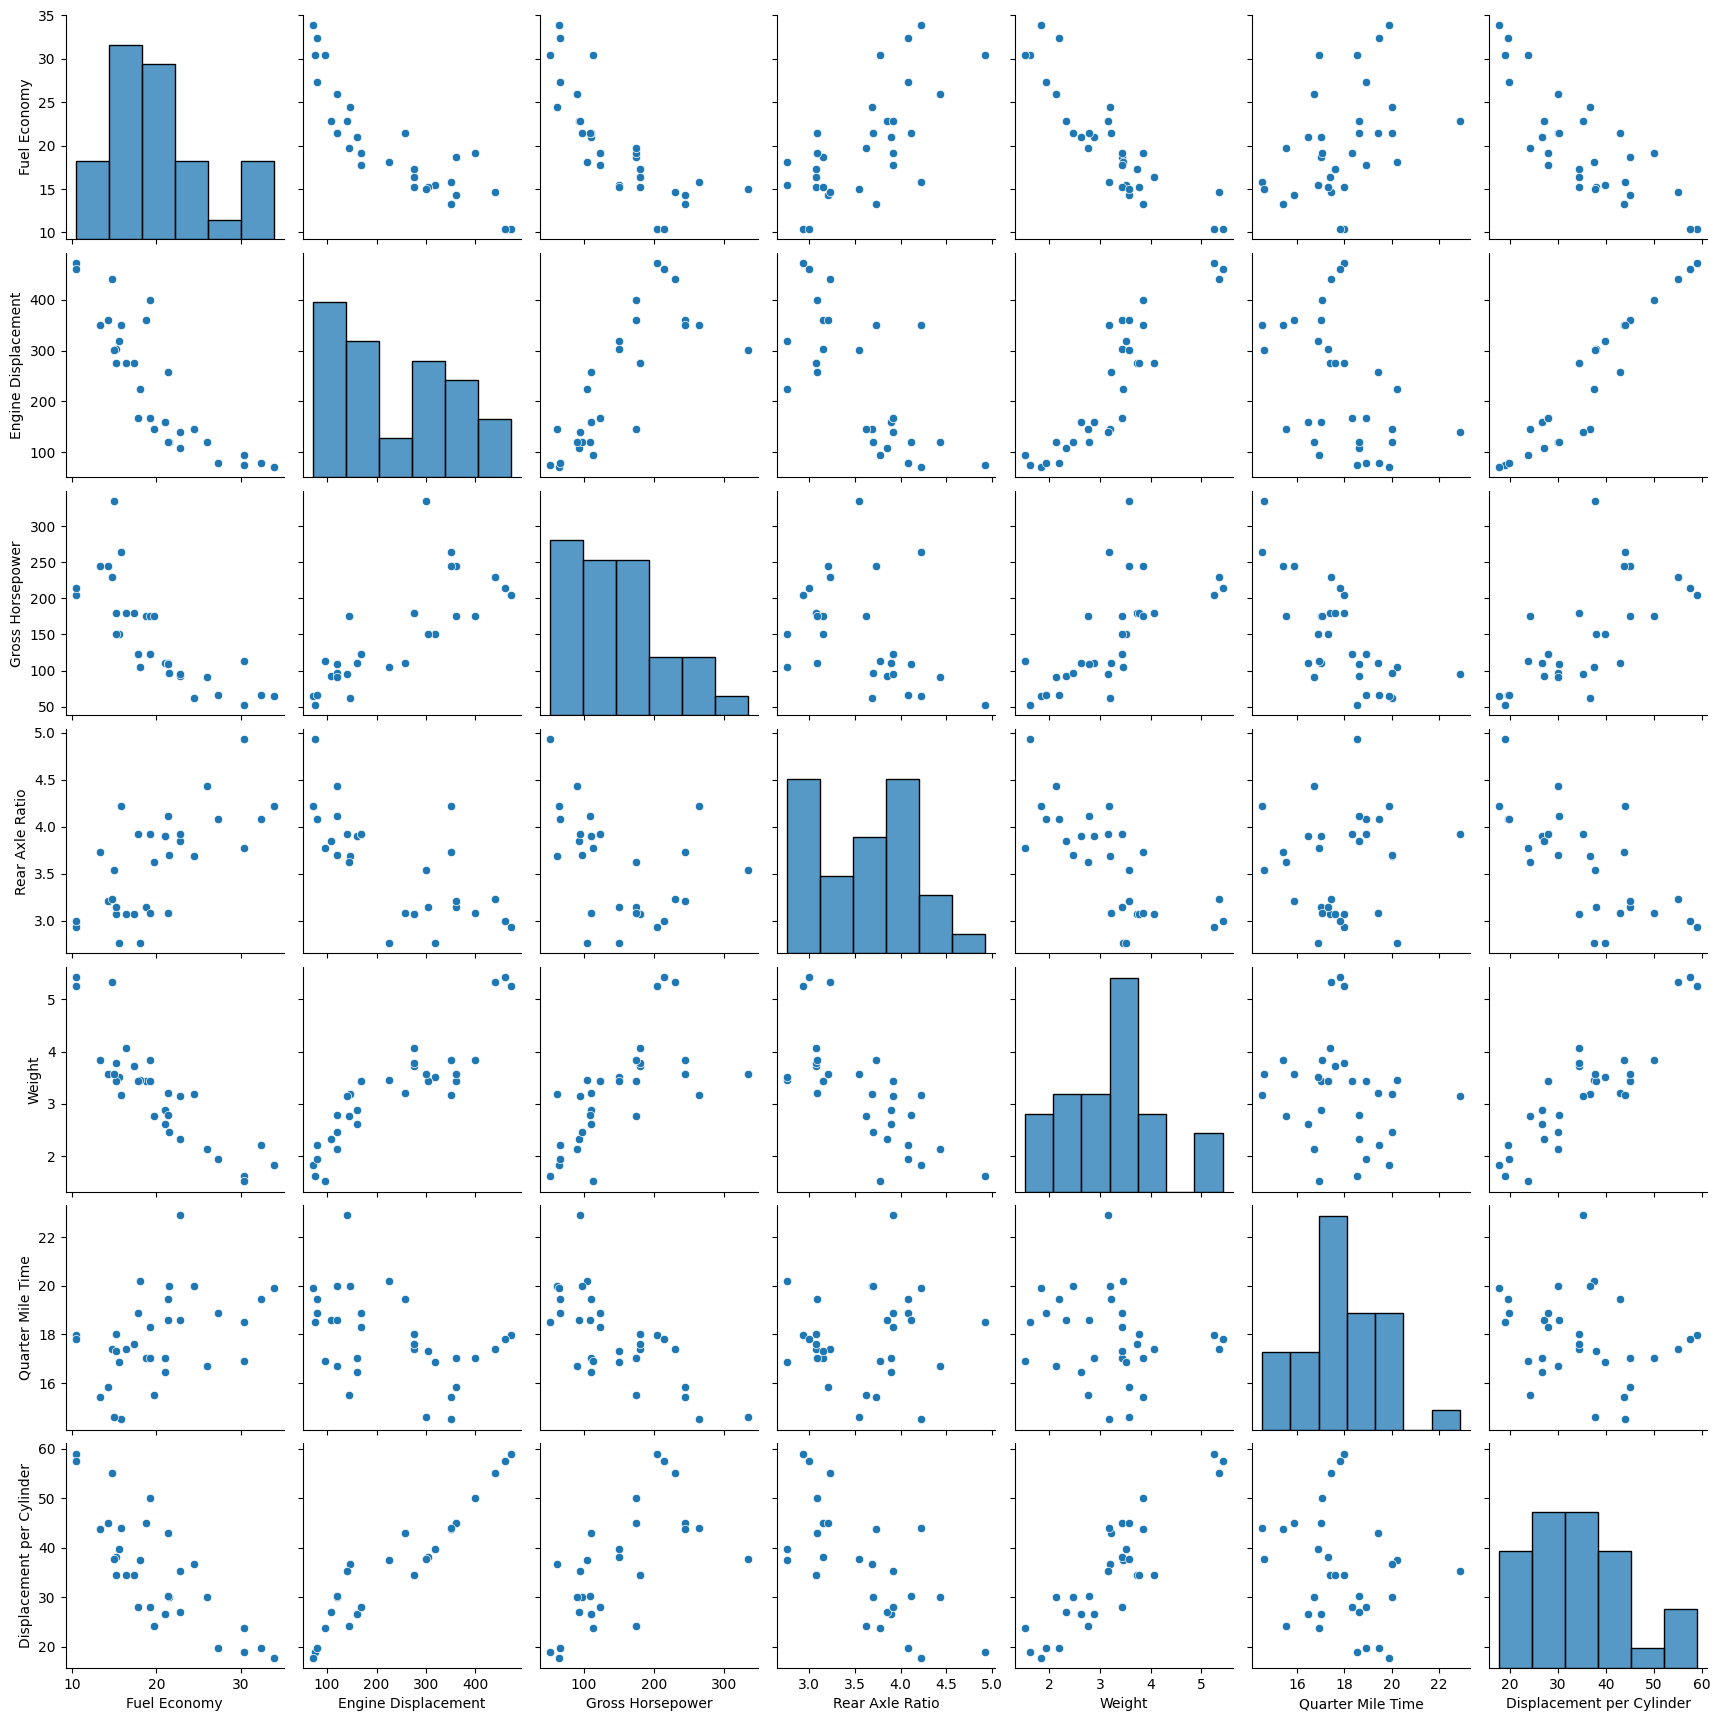

In [14]:
sns.pairplot(data=mtcars[continuous_variables])
plt.show()

Looking over the pairplots for all the combinations of our countinuous variables we see that the majority of our plots show linear trends with many of them being strong trends.

### Pearson Correlation Heatmap

Since our pairplots showed strong linear trends among our continuous variables, we will view a Pearson correlation 
heatmap to give us a better understanding on the strength of those linear relationships and their direction.

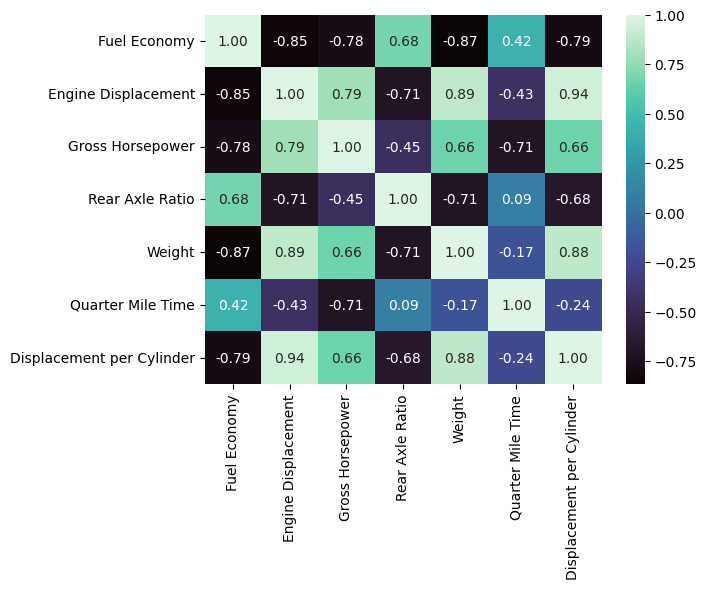

In [15]:
mtcars_corr: pd.DataFrame = mtcars[continuous_variables].corr(method='pearson')
sns.heatmap(mtcars_corr, annot=True, cmap='mako', fmt='.2f')
plt.show()

Inspection of the Pearson correlation heatmap shows that many of our continuous variables have a significant 
correlation coefficient value in both negative and positive directions.

In [16]:
len(mtcars_corr.query("abs(@mtcars_corr) > 0.7 and @mtcars_corr != 1").stack()) / 2

11.0

After a computation we find that 11 out of the 21 combinations of continuous variables do indeed have a strong linear
relationship according to the Pearson correlation test.

## Section 8. Initial Insights

Through our exploratory data analysis we have found that the Lotus Europa is the fastest straight 
engine car and the only straight engine car that is faster than any car with a V engine type.  We 
also found that there are strong positive and negative linear relationships for many of the 
combinations of continuous variables of our mtcars dataset according to the Pearson correlation 
test. 